In [35]:
import os,sys
sys.path.insert(1, os.path.join(os.getcwd()  , '..'))
import shallowsim as sb
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import time
from tqdm import tqdm, trange


In [36]:
args = sb.ModelArgs()
c = sb.Config()
gpu_all_decode = sb.get_gpu_info('./device/gpu_info.csv',decoding_mode=True) 

In [37]:

# generate data
dfs = []
for seq_len in trange(1024,16384,32):
    c.seq_len = seq_len
    df = sb.decode_time_with_ep_list(args,gpu_all_decode,c,fp8_combine=True)
    df['index_value'] = seq_len
    df_o = df.groupby(['GPU','BatchSize','EP'],as_index=False).apply(lambda t: t[t.Total==t.Total.max()]).sort_values(['Total'],ascending=False).reset_index(drop=True)
    df_o.drop_duplicates(subset=['GPU','BatchSize','EP'], keep='first', inplace=True)
    dfs.append(df_o)
df = pd.concat(dfs)    
df.reset_index(inplace=True,drop=True)
df.to_csv('perf_vs_seq_len.csv')


100%|████████████████████████████████████████████████████████████████████████████████████████| 480/480 [04:17<00:00,  1.86it/s]


In [38]:
#df = pd.read_csv('perf_vs_seq_len.csv')
#df['BatchSize']= df['BatchSize'].astype(int).astype(str)

In [39]:
df

,GPU,TP,EP,BatchSize,DenseMLA,DenseMLP,SparseMLA,Combine,SharedExpert,RoutedExpert,...,COMM_SUM,Delta,TPOT,TPOT_O,TPS,TPS_O,Total,Total_O,Comm_Impact,index_value
0,GB300-NVL72,4,72,512,0.162251,0.078157,0.140563,0.046601,0.010200,0.061011,...,0.093203,-0.057561,13.004159,13.004159,76.898478,76.898478,39372.020755,39372.020755,0.0,1024
1,GB300-NVL72,4,36,512,0.162251,0.078157,0.140563,0.046601,0.011042,0.088337,...,0.093203,-0.058403,14.637879,14.637879,68.315910,68.315910,34977.745728,34977.745728,0.0,1024
2,GB200-NVL72,4,72,512,0.233037,0.103338,0.163430,0.046601,0.013756,0.085341,...,0.093203,-0.083983,16.235649,16.235649,61.592858,61.592858,31535.543421,31535.543421,0.0,1024
3,GB300-NVL72,8,72,256,0.081126,0.062240,0.094795,0.028301,0.008095,0.044168,...,0.056601,-0.046288,8.959471,8.959471,111.613729,111.613729,28573.114659,28573.114659,0.0,1024
4,GB300-NVL72,4,16,512,0.162251,0.078157,0.140563,0.046601,0.013990,0.153094,...,0.093203,-0.061350,18.564723,18.564723,53.865603,53.865603,27579.188929,27579.188929,0.0,1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121664,H20,4,16,16,0.977394,0.161588,0.340880,0.051176,0.071383,0.768714,...,0.081765,-0.330499,71.913630,71.913630,13.905570,13.905570,222.489115,222.489115,0.0,16352
121665,H20,1,36,32,1.902307,0.212000,1.952307,0.092353,0.049601,0.396804,...,0.143529,-1.858378,145.468191,145.468191,6.874355,6.874355,219.979364,219.979364,0.0,16352
121666,H20,1,16,32,1.902307,0.212000,1.952307,0.092353,0.069516,0.753777,...,0.143529,-1.878294,167.327726,167.327726,5.976296,5.976296,191.241468,191.241468,0.0,16352
121667,H20-3E,1,8,32,1.879800,0.193470,1.929800,0.019150,0.113943,1.405663,...,0.033725,-2.010018,206.285371,206.285371,4.847653,4.847653,155.124912,155.124912,0.0,16352


In [40]:
#df1 = df[df['EP'] == 144].reset_index(drop=True)
df1 = df[df['BatchSize'] == 128].reset_index(drop=True)

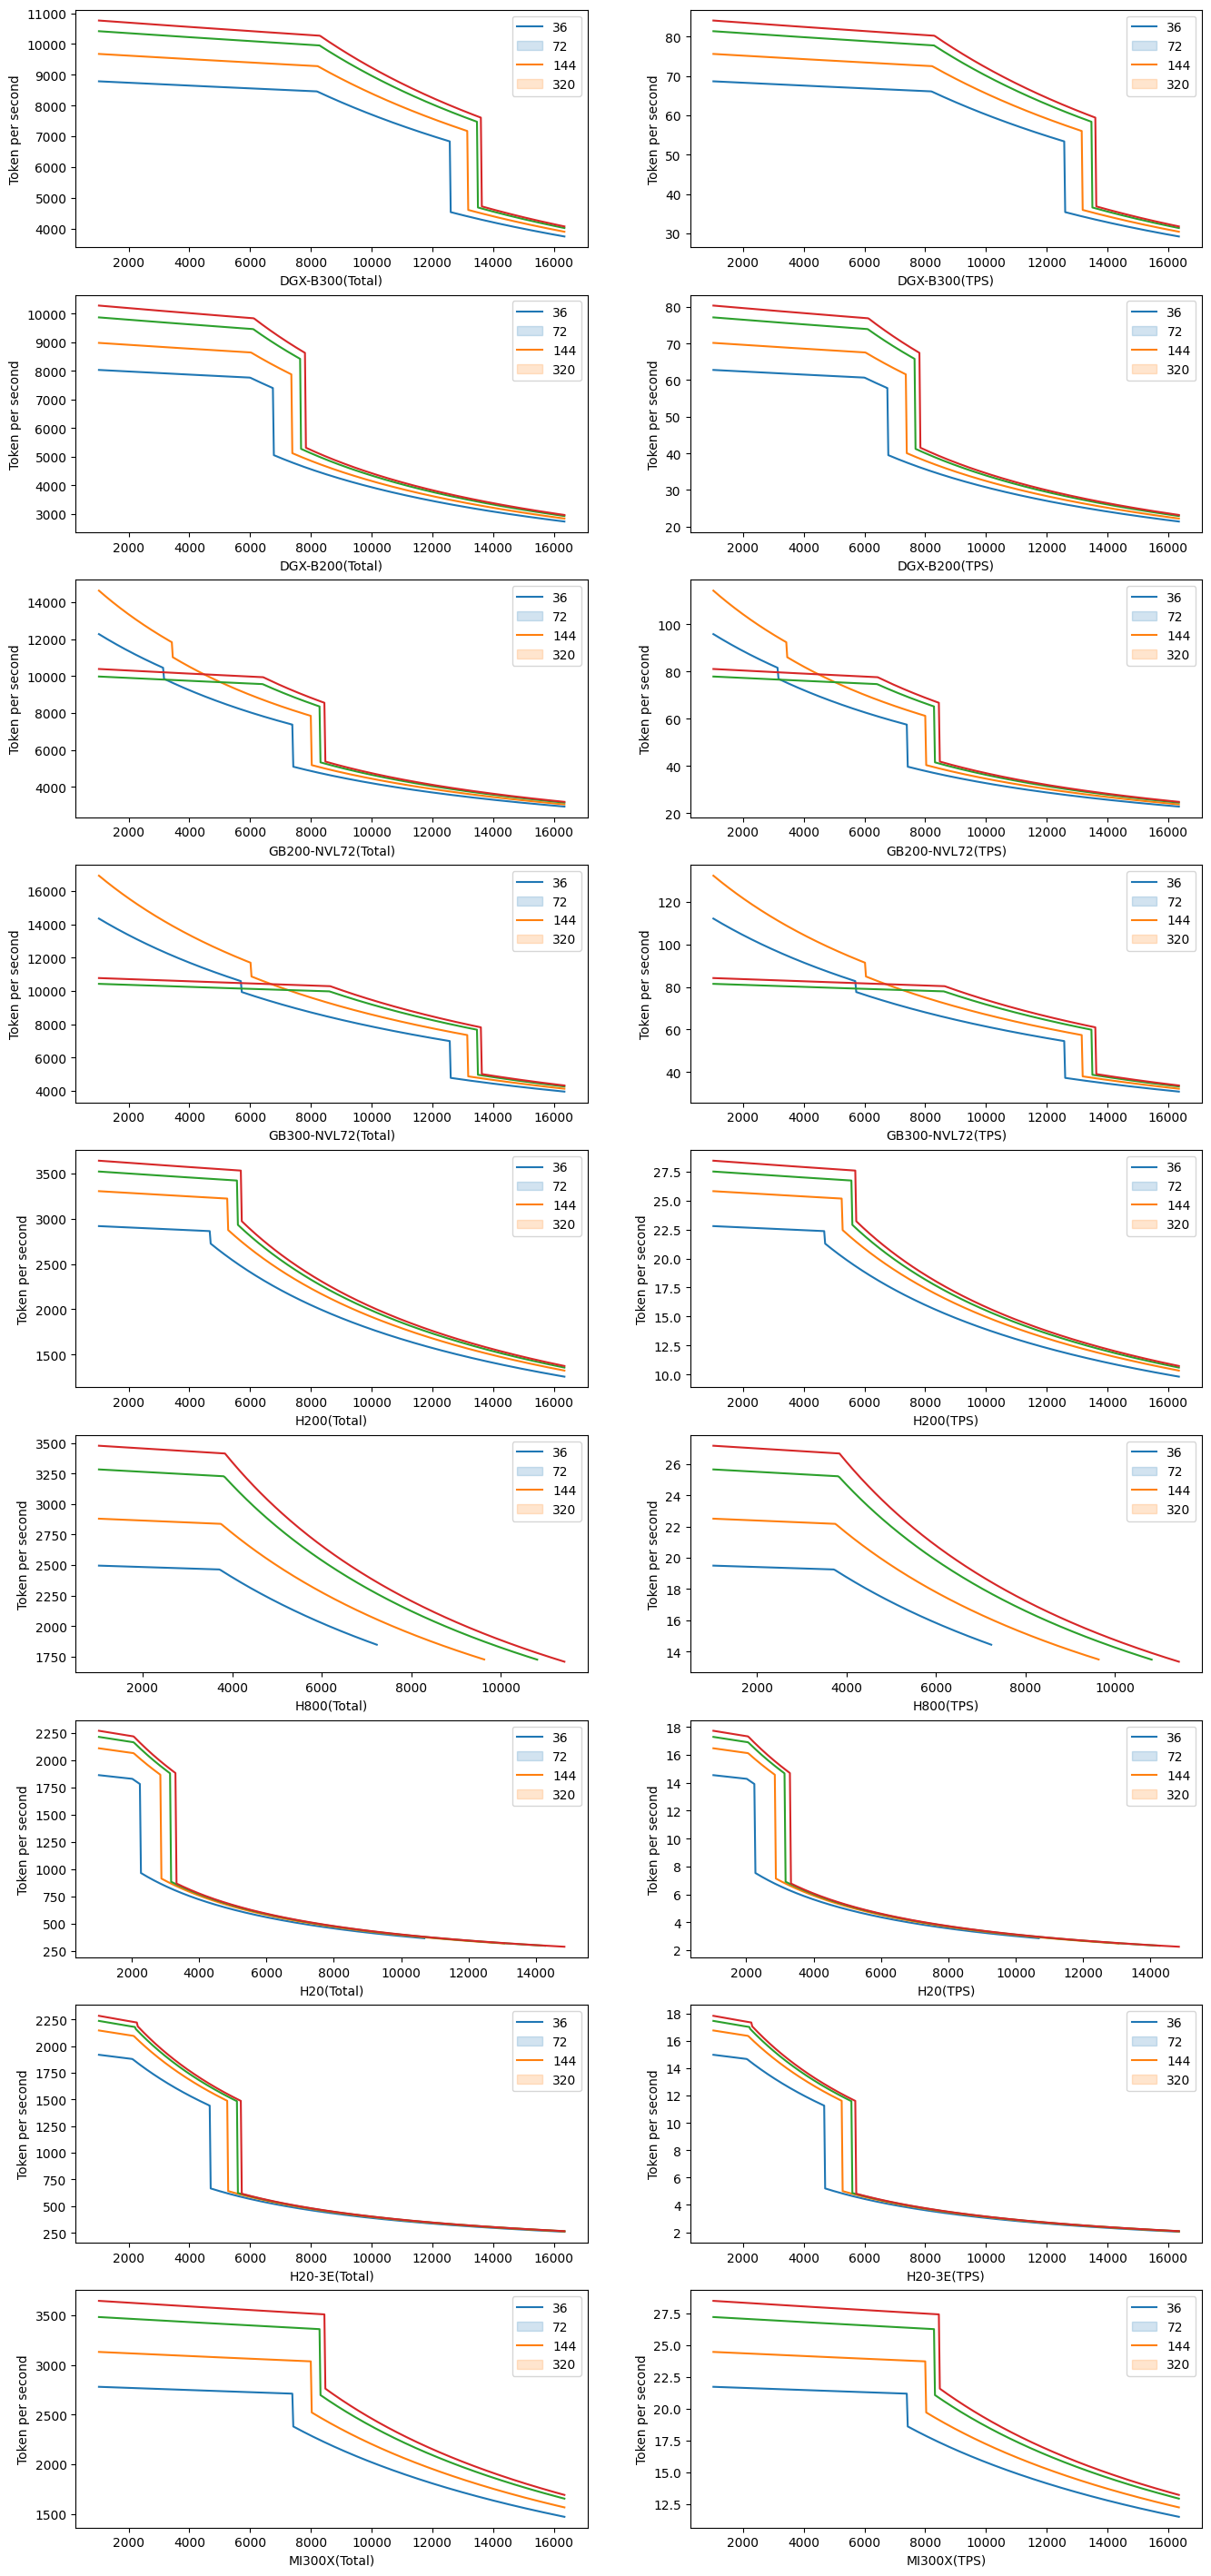

In [43]:
sb.draw(df1, gpu_all_decode, 'EP',[36,72,144,320], ['Total','TPS'],'Token per second')

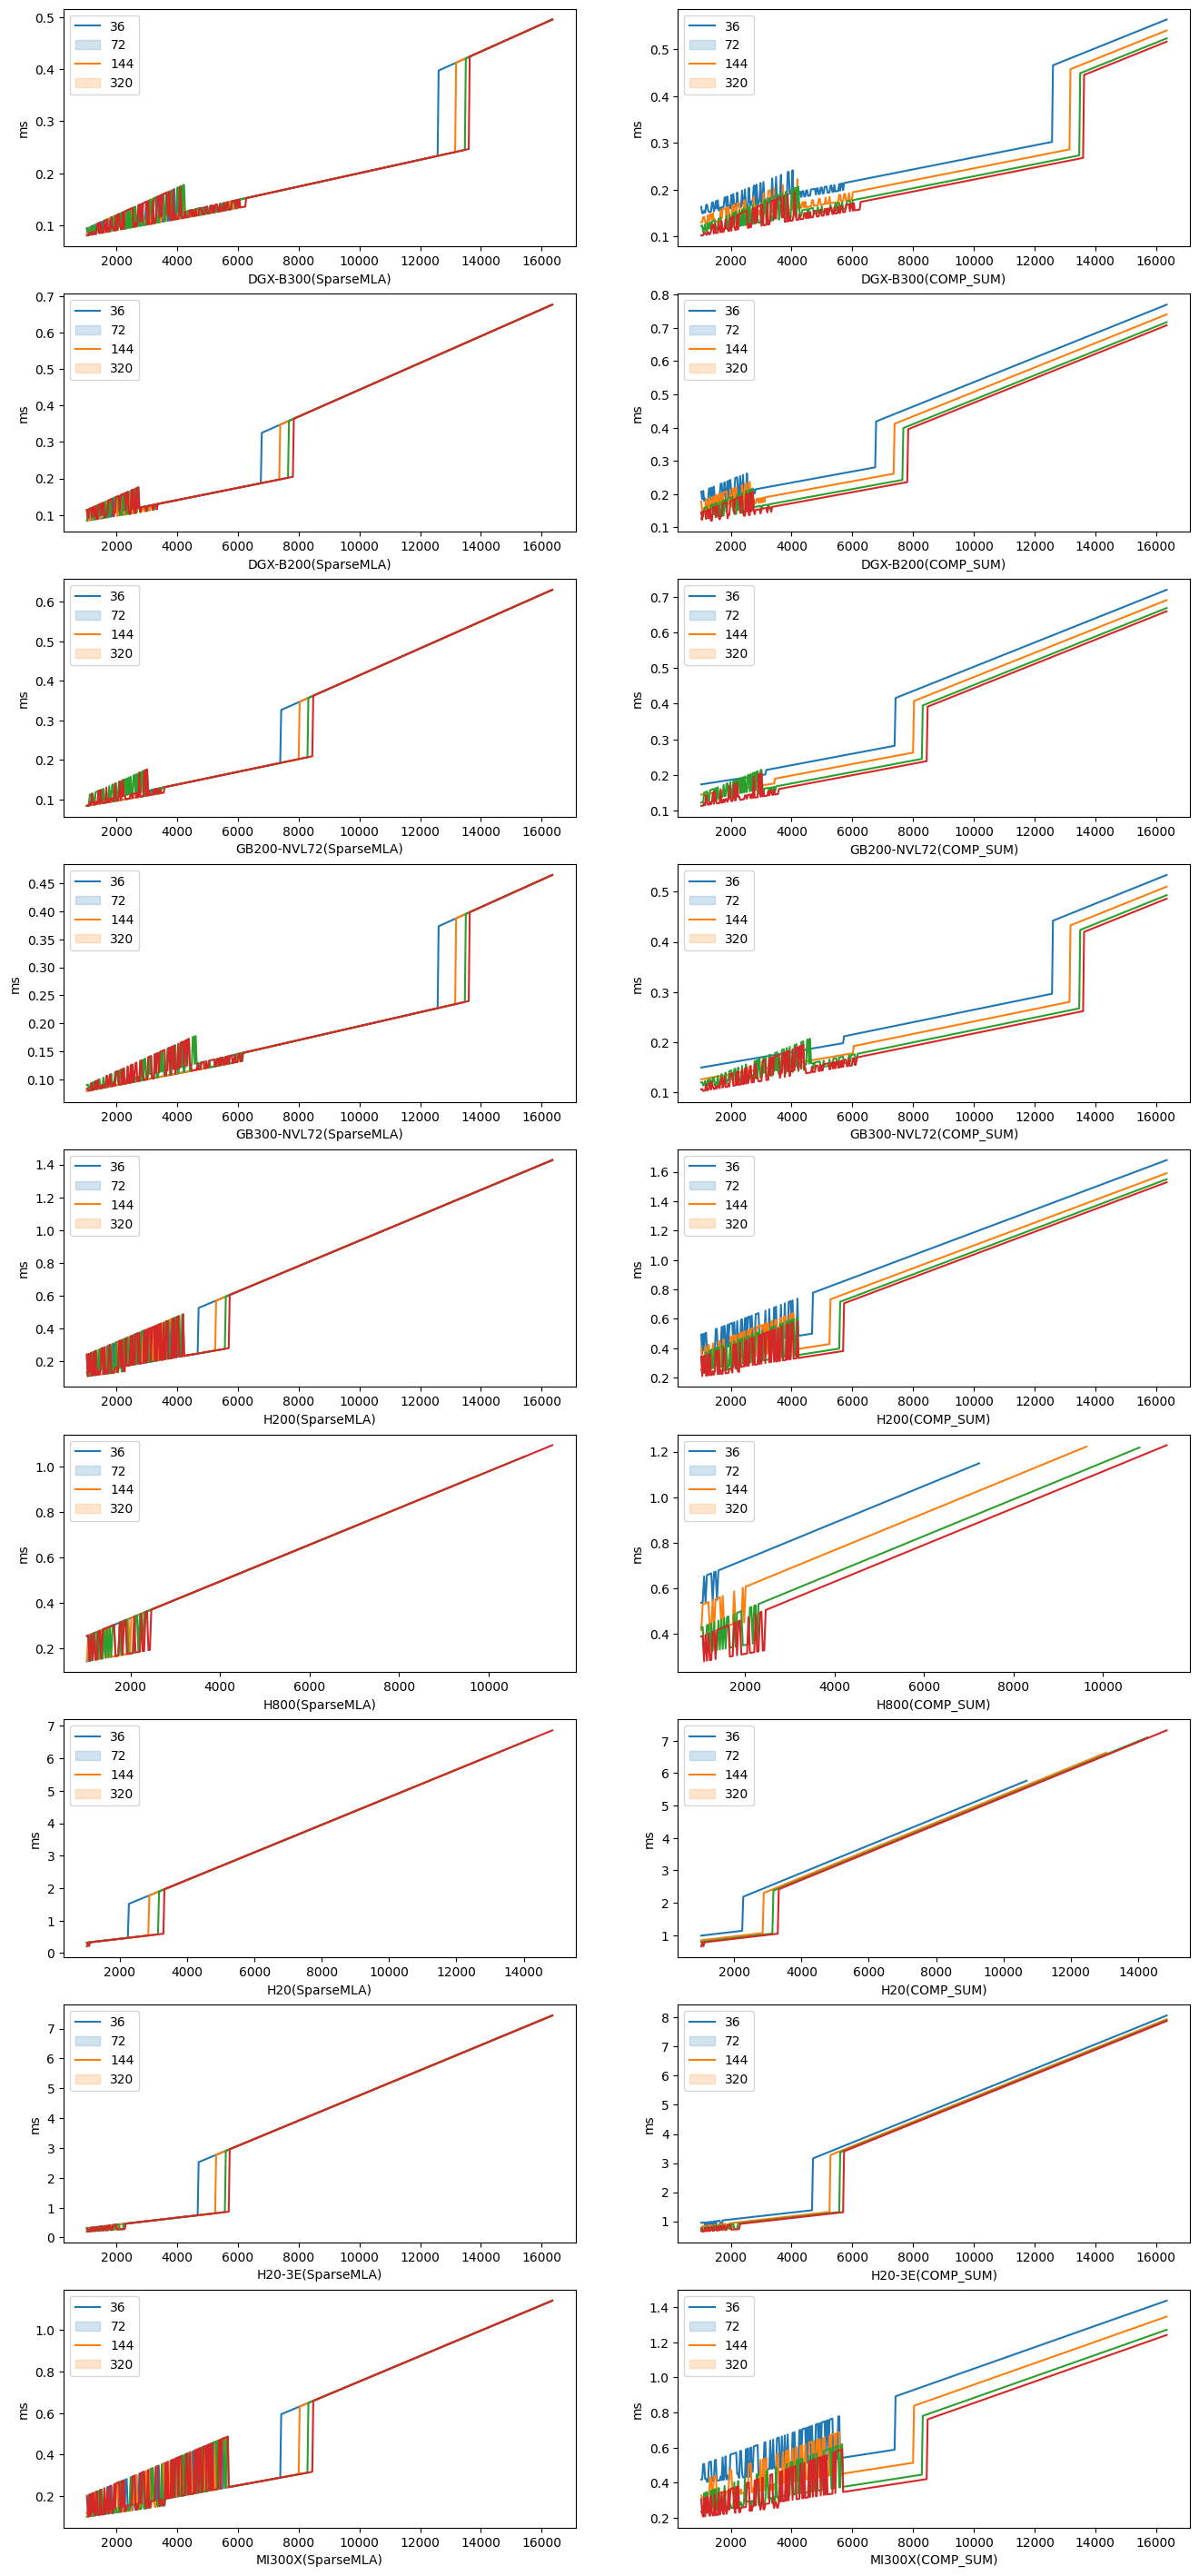

In [44]:
sb.draw(df1, gpu_all_decode, 'EP',[36,72,144,320],  ['SparseMLA','COMP_SUM'],'ms')